In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [89]:
df = pd.read_csv('../datasets/Data.csv')
df.head(10)

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes


In [90]:
dfOrderedAscCountry = df.sort_values(by='country', ascending=True)
dfOrderedDescYear = df.sort_values(by='year', ascending=False)
dfOrderedDescYear.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes


In [91]:
#dfDropCommodityDuplicates = df.commodity.drop_duplicates()
#dfDropCommodityDuplicates

#count = df.commodity.unique().size
#count

print(df.commodity.value_counts())

Series([], Name: commodity, dtype: int64)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


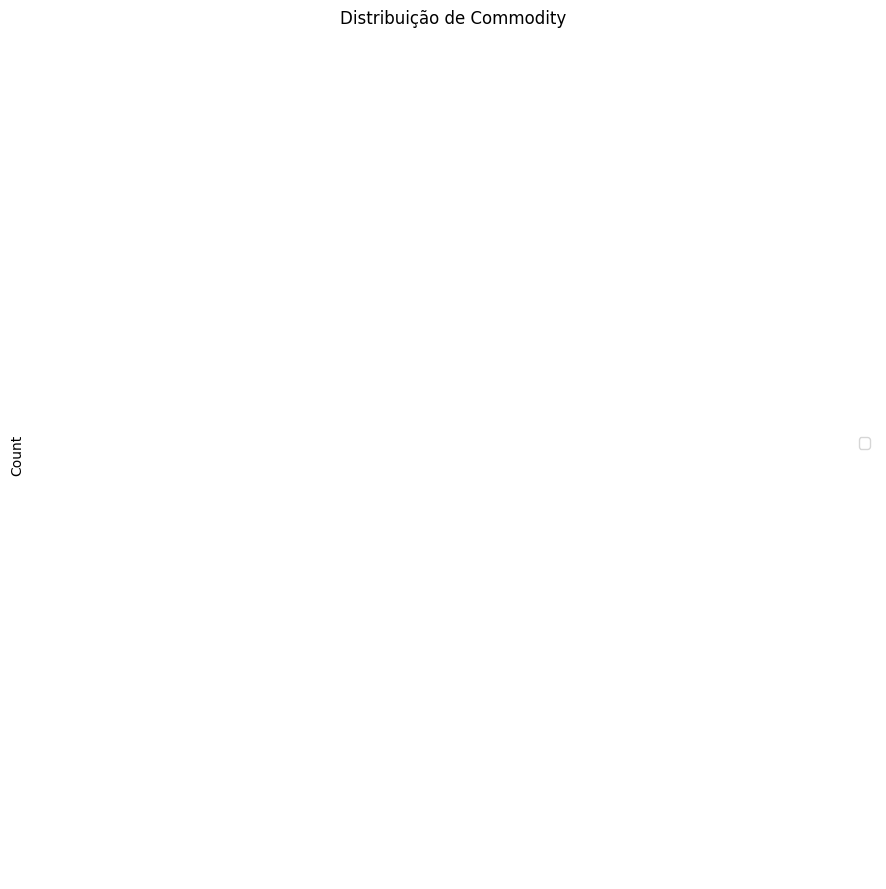

In [92]:
fig, ax = plt.subplots(figsize=(11, 11))

# plotar gráfico de pizza
dfCommodityCount.plot.pie(y='Count', ax=ax, labels=dfCommodityCount['Commodity'], autopct='%1.1f%%')

# definir título do gráfico
ax.set_title('Distribuição de Commodity')

# ajustar posição da legenda
ax.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

# mostrar gráfico
plt.show()

In [93]:
# agrupar dataframe por "country" e "commodity" e contar o número de aparições de cada commodity
df_grouped = df.groupby(['country', 'commodity']).size().reset_index(name='Count')

# agrupar dataframe por "commodity" e somar as aparições de cada commodity em todos os "country"
df_summed = df_grouped.groupby(['commodity'])['Count'].sum().reset_index(name='Total')

print(df_summed)

Empty DataFrame
Columns: [commodity, Total]
Index: []


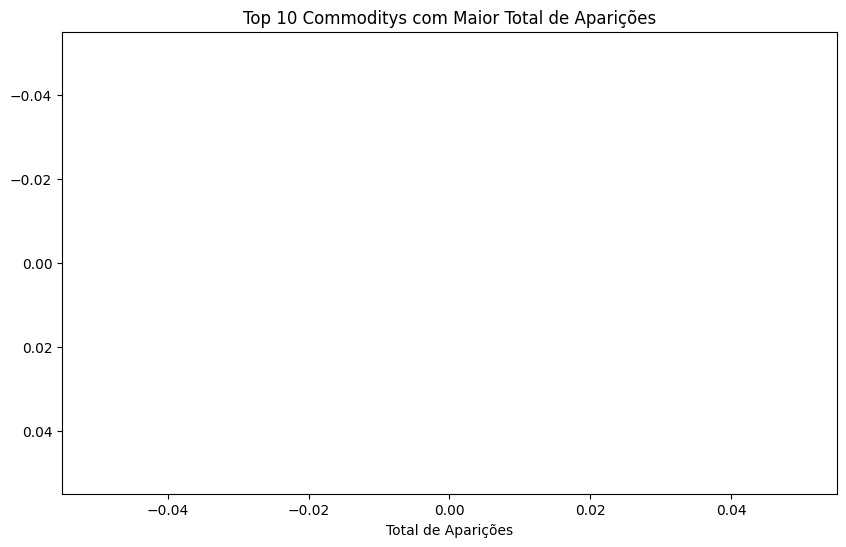

In [94]:
df_top10 = df_summed.nlargest(10, 'Total')

# criar figura com tamanho personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# plotar gráfico de barras horizontais
bars = ax.barh(df_top10['commodity'], df_top10['Total'])

# definir título do gráfico
ax.set_title('Top 10 Commoditys com Maior Total de Aparições')

# definir rótulo do eixo x
ax.set_xlabel('Total de Aparições')

# inverter ordem dos valores no eixo y para que o gráfico comece com a commodity mais à esquerda
ax.invert_yaxis()

# adicionar informações numéricas acima de cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, '{:.0f}'.format(width), ha='left', va='center')

# mostrar gráfico
plt.show()

In [96]:
df

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
